# Assignment 1: Job Market Analysis

## Part 1 - Data Preperation and Preprocesing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import SparkContext, SparkConf
%matplotlib inline

In [2]:
# Importing data
df = pd.read_csv("data.csv", low_memory=False)

In [3]:
# Display head of the data
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [4]:
# Display the shape of the dataset
print("DataFrame shape:\n")
print(df.shape)

DataFrame shape:

(318477, 13)


In [5]:
# Display the datatypes of each column
print("Column datatypes:\n")
print(df.dtypes)

Column datatypes:

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


In [6]:
# Check for null values and display them
print("NULL values:\n")
print(df.isnull().sum())

NULL values:

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
dtype: int64


In [7]:
# Simplifying date datatype
print("Change date datatype:\n")

print("Original:")
print(df['Date'][0],"\n")

# Changing date datatype
df['Date'] = df['Date'].astype('datetime64[ns]')

print("New:")
print(df['Date'][0])

Change date datatype:

Original:
2018-10-07T00:00:00.000Z 

New:
2018-10-07 00:00:00


In [8]:
# Seems like removing the IDs reveals a bunch of duplicate data so I've just commented this out for now.
""""
# Changing ID datatype

# Some IDs have not been entered correctly, eg: '37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676'
# Need to trim the first 8 characters before converting to int

df['Id'] = df['Id'].str[:8].astype('int64')
"""

'"\n# Changing ID datatype\n\n# Some IDs have not been entered correctly, eg: \'37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676\'\n# Need to trim the first 8 characters before converting to int\n\ndf[\'Id\'] = df[\'Id\'].str[:8].astype(\'int64\')\n'

In [9]:
# Remove the Id and FullDescription column
df = df.drop('Id', axis=1)
df = df.drop('FullDescription', axis=1)
df

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0,30,NaN
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,0,30,NaN
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,200,999,NaN
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,200,999,NaN
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,200,999,NaN
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,200,999,NaN


In [10]:
# Removing NaN values
print("Removing Classification & Location NaN values:\n")
print("No. of records:", df.shape[0])
# df.dropna(subset = ["Classification"], inplace=True)
print("No. of records (removing Classification NaNs):", df.shape[0])
# df.dropna(subset = ["Location"], inplace=True)
print("No. of records (removing Location NaNs):", df.shape[0])
df

Removing Classification & Location NaN values:

No. of records: 318477
No. of records (removing Classification NaNs): 318477
No. of records (removing Location NaNs): 318477


,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0,30,NaN
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,0,30,NaN
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,200,999,NaN
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,200,999,NaN
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,200,999,NaN
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,200,999,NaN


In [11]:
# Removing records with SubClassification of Other
# It doesn't really tell us much
print("Removing Rows with 'Other' SubClassification:\n")
print("No. of records:", df.shape[0])
df = df[df.SubClassification != 'Other']
print("No. of records (removing Other SubClassification):", df.shape[0])

Removing Rows with 'Other' SubClassification:

No. of records: 318477
No. of records (removing Other SubClassification): 307128


In [12]:
# Removing duplicate data
print("Removing Duplicates:\n")

# Check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(before)")

# Remove duplicates:
df.drop_duplicates(inplace=True)

# Re-check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(after)")

Removing Duplicates:

No. of duplicates: 9840 (before)


C:\Users\Jarrer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No. of duplicates: 0 (after)


In [13]:
# How many jobs do we have in total?
total_jobs = df.shape[0]

# How many jobs have lowest salary equal to $0?
lowest_size = df[(df['LowestSalary'] == 0)].shape[0]

# How many jobs have highest salary equal to $999k?
highest_size = df[(df['HighestSalary'] == 999)].shape[0]

# How many jobs have both the highest and lowest salary ($0k - $999k)
both_size = df[(df['HighestSalary'] == 999) & (df['LowestSalary'] == 0)].shape[0]

print("Total jobs:", total_jobs, "\n")
      
print("Lowest $0 jobs: %d" % lowest_size)
print("(%.2f%% of jobs)\n" % (lowest_size / total_jobs * 100))
      
print("Highest $999k jobs: %d" % highest_size)
print("(%.2f%% of jobs)\n" % (highest_size / total_jobs * 100))

print("Both Lowest $0 and Highest $999k jobs: %d" % both_size)
print("(%.2f%% of jobs)" % (both_size / total_jobs * 100))

Total jobs: 297288 

Lowest $0 jobs: 58622
(19.72% of jobs)

Highest $999k jobs: 10648
(3.58% of jobs)

Both Lowest $0 and Highest $999k jobs: 0
(0.00% of jobs)


In [14]:
# Creating column for average salary
# The SEEK listing allows us to search listings from 30k -> 200k+
# Thus we will increase 0k salaries to 15k and 999k salaries to 300k to keep it closer to these amounts.

df.loc[df['LowestSalary'] == 0, 'LowestSalary'] = 15
df.loc[df['HighestSalary'] == 999, 'HighestSalary'] = 300

# Create row for average salary (Mean of Lowest and Highest salary)
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Multiply our salaries by 1000 (1 = 1k so we want 1 = 1000)
df['LowestSalary'] = df['LowestSalary'] * 1000
df['HighestSalary'] = df['HighestSalary'] * 1000
df['AvgSalary'] = df['AvgSalary'] * 1000

# Convert our AvgSalary from float -> int
df['AvgSalary'] = df['AvgSalary'].astype('Int64')

C:\Users\Jarrer\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Jarrer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Jarrer\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [15]:
# See our new column
df.head(7)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,15000,30000,NaN,22500
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,15000,30000,NaN,22500
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,15000,30000,NaN,22500
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,15000,30000,NaN,22500
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",15000,30000,NaN,22500
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",15000,30000,NaN,22500
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,15000,30000,NaN,22500


In [16]:
# Remove area from titles and move to the area column
print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

df.loc[df['Area'].isnull(), 'Area'] = df['Title'].str.split(' in ').str[1]
df.loc[df['Title'].str.contains(' in '), 'Title'] = df['Title'].str.split(' in ').str[0]

print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

Number of Titles containing Area: 11751
Number of Titles containing Area: 0


In [17]:
# move JobType column up the dataframe so that all the salaries are together
cols = list(df)
cols.insert(8, cols.pop(cols.index('JobType')))
df = df.loc[:, cols]
df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,15000,30000,22500
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,15000,30000,22500
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,15000,30000,22500
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,15000,30000,22500
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,15000,30000,22500


In [18]:
# Normalising the data
df_norm = df.copy() # Create a copy of the DataFrame that will be using normalized values

columns_to_normalize = ['LowestSalary','HighestSalary','AvgSalary'] # Normalize our columns with int values

scaler = StandardScaler() # Declare the standard scaler for normalizing
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize]) # Fit and transform our data

In [19]:
# See our new normalized data
df_norm

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.126190,-0.920290,-1.011241
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.126190,-0.920290,-1.011241
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,-1.126190,-0.920290,-1.011241
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,-1.126190,-0.920290,-1.011241
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,-1.126190,-0.920290,-1.011241
...,...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,2.774603,3.294962,3.083823
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,2.774603,3.294962,3.083823
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,2.774603,3.294962,3.083823
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,2.774603,3.294962,3.083823


### Dataset overview
< Will copy paste from documentation >

### Data preperation and preprosessing
< Will copy paste from documentation >

### Hypothesis
< Will copy paste from documentation >



## Part 2 - Data Analysis and Interpretation

### Job metadata
Extract the relevant information to describe the job’s
attributes.
For example:
- What is the sector, sub-sector of each job?
- Where is the location of the job?
- Which is the range of salaries for each job?

First impressions about the dataset.
How many records are there?
How many locations?
What are the ranges of salaries?

In [20]:
# Basic summary about the numerial data
df_summary = df.describe()
print(df_summary)

        LowestSalary  HighestSalary     AvgSalary
count  297288.000000  297288.000000  297288.00000
mean    68410.968488   88947.417992   78679.19324
std     47426.329715   64053.226969   55554.77798
min     15000.000000   30000.000000   22500.00000
25%     30000.000000   40000.000000   35000.00000
50%     60000.000000   70000.000000   65000.00000
75%    100000.000000  120000.000000  110000.00000
max    200000.000000  300000.000000  250000.00000


In [21]:
# Number of records
print("Total records: %s\n" % df.shape[0])

Total records: 297288



In [22]:
# Salary ranges
print("Salary ranges:\n")
df_salaries = df[['LowestSalary','HighestSalary','AvgSalary']].copy()
for r in df_salaries.loc[:, ['LowestSalary', 'HighestSalary']].drop_duplicates().values:
    print("$%s -> $%s" % (r[0],r[1]))

Salary ranges:

$15000 -> $30000
$30000 -> $40000
$40000 -> $50000
$50000 -> $60000
$60000 -> $70000
$70000 -> $80000
$80000 -> $100000
$100000 -> $120000
$120000 -> $150000
$150000 -> $200000
$200000 -> $300000


In [23]:
# LOCATION
# Creating new DataFrame with removed NaN location values.
print("Location")
print("No. of Locations: %s" % len(df.Location.unique()))
df['Location'].value_counts()

Location
No. of Locations: 66


Sydney                                  57290
Melbourne                               43975
Brisbane                                20102
Perth                                   12398
Adelaide                                 6151
                                        ...  
Yorke Peninsula & Clare Valley             84
Tumut, Snowy & Monaro                      79
Fleurieu Peninsula & Kangaroo Island       58
Central & South East TAS                   55
Somerset & Lockyer                         55
Name: Location, Length: 65, dtype: int64

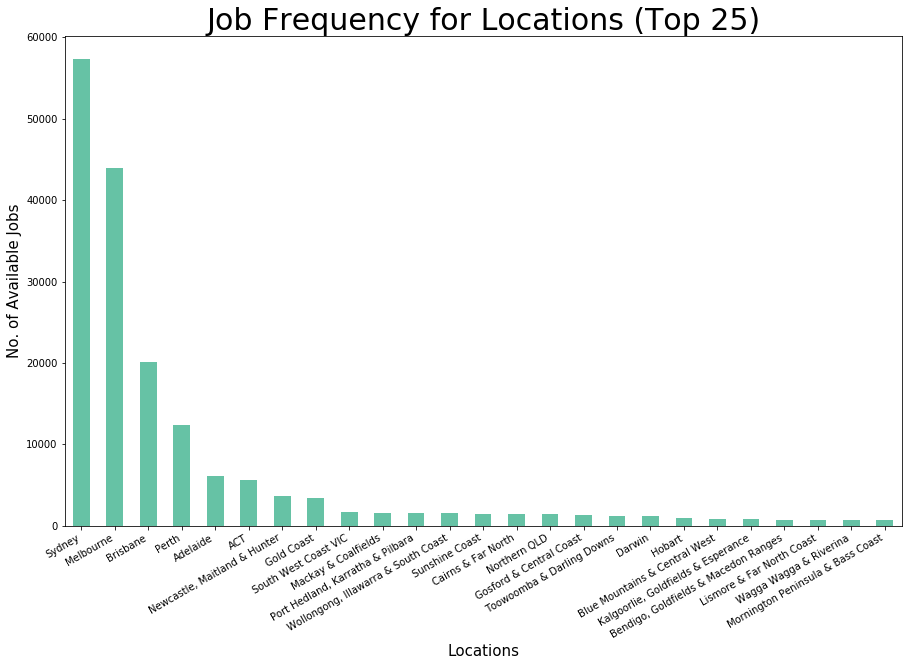

In [24]:
# Histogram showing dataspread of locations
f, ax = plt.subplots(figsize=(15, 10))
df['Location'].value_counts().head(25).plot(ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Job Frequency for Locations (Top 25)", fontsize=30)
plt.ylabel("No. of Available Jobs", fontsize=15)
plt.xlabel("Locations", fontsize=15)
plt.show()

In [25]:
# CLASSIFICAITONS
print("Classifications")
print("No. of Clasisfications: %s" % len(df.Classification.unique()))
df['Classification'].value_counts()

Classifications
No. of Clasisfications: 31


Information & Communication Technology    21687
Trades & Services                         17005
Healthcare & Medical                      16165
Hospitality & Tourism                     14905
Manufacturing, Transport & Logistics      11854
Administration & Office Support            9402
Accounting                                 9192
Sales                                      7865
Retail & Consumer Products                 7549
Construction                               7475
Education & Training                       7380
Government & Defence                       7011
Engineering                                6072
Mining, Resources & Energy                 5862
Community Services & Development           4253
Banking & Financial Services               4250
Legal                                      3928
Human Resources & Recruitment              3919
Call Centre & Customer Service             3799
Marketing & Communications                 3768
Real Estate & Property                  

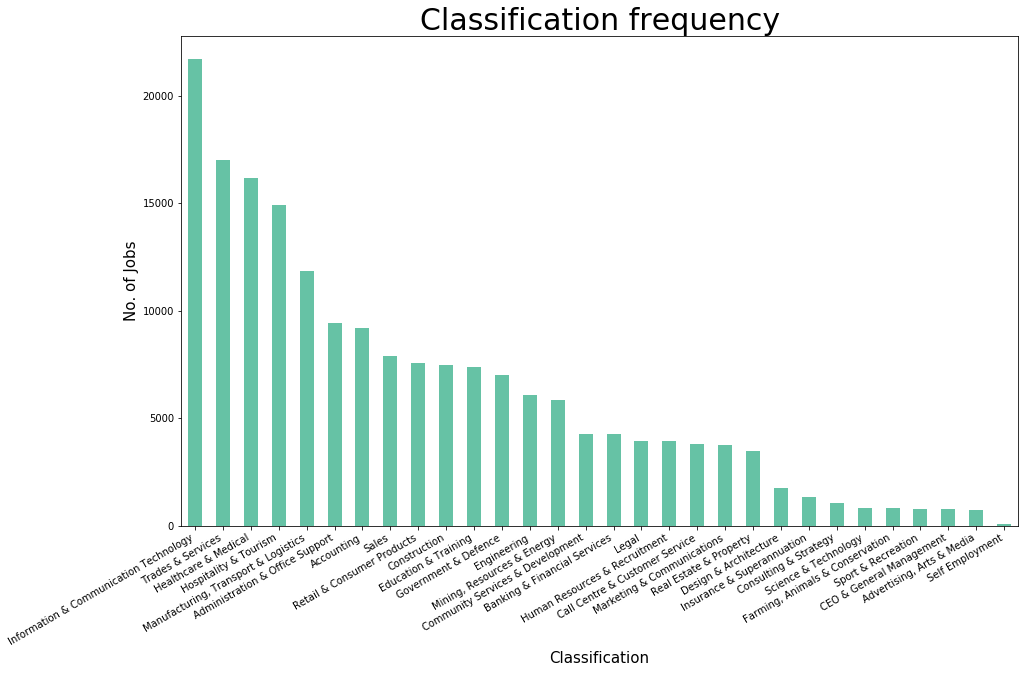

In [26]:
# Histogram showing dataspread of Classifications
f, ax = plt.subplots(figsize=(15, 10))
df['Classification'].value_counts().plot(ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Classification frequency", fontsize=30)
plt.ylabel("No. of Jobs", fontsize=15)
plt.xlabel("Classification", fontsize=15)
plt.show()

In [28]:
# SUB-CLASSIFICATIONS
print("Sub-Classifications")
print("No. of Sub-Classifications: %s" % len(df.SubClassification.unique()))
df['SubClassification'].value_counts()

Sub-Classifications
No. of Sub-Classifications: 338


Management                    6216
Chefs/Cooks                   4590
Administrative Assistants     4561
Developers/Programmers        4189
Retail Assistants             3879
                              ... 
Modelling & Simulation          14
Computer Operators              13
Air Force                       12
Chiropractic & Osteopathic      11
Army                             5
Name: SubClassification, Length: 337, dtype: int64

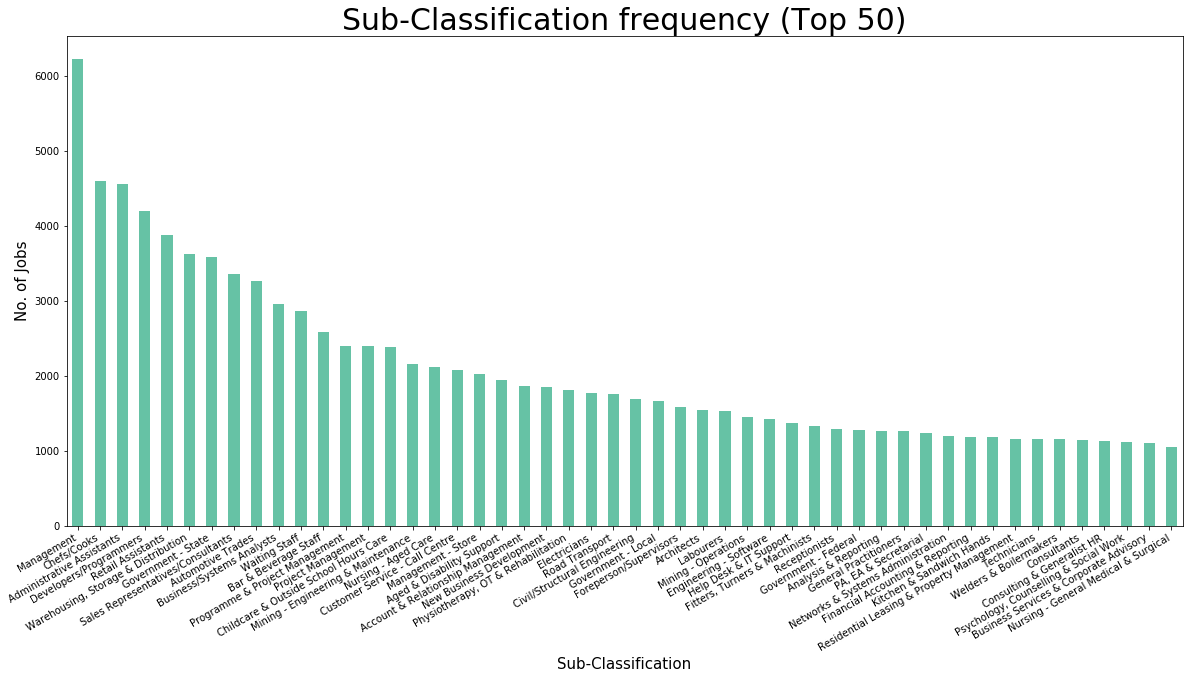

In [29]:
# Histogram showing dataspread sub-classifications
f, ax = plt.subplots(figsize=(20, 10))
df['SubClassification'].value_counts().head(50).plot(ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Sub-Classification frequency (Top 50)", fontsize=30)
plt.ylabel("No. of Jobs", fontsize=15)
plt.xlabel("Sub-Classification", fontsize=15)
plt.show()

In [30]:
print("Sub-Classifications per Classification:\n")

sub_classification_ranking = []
for c in df.Classification.unique():
    sub_cla_size = len(df['SubClassification'].loc[df['Classification'] == c].unique())
    sub_classification_ranking.append([sub_cla_size, c])

# Sort the list based on amount of sub classifications
sub_classification_ranking.sort(key=lambda x: -x[0])

for s in sub_classification_ranking:
    print("%s %s" % (s[0], s[1]))

Sub-Classifications per Classification:

32 Healthcare & Medical
24 Accounting
23 Trades & Services
21 Information & Communication Technology
20 Engineering
19 Manufacturing, Transport & Logistics
18 Legal
16 Banking & Financial Services
16 Mining, Resources & Energy
15 Education & Training
12 Hospitality & Tourism
12 Marketing & Communications
11 Government & Defence
11 Advertising, Arts & Media
10 Human Resources & Recruitment
10 Insurance & Superannuation
10 Design & Architecture
10 Construction
10 Science & Technology
9 Community Services & Development
8 Administration & Office Support
8 Real Estate & Property
8 Farming, Animals & Conservation
7 Retail & Consumer Products
7 Call Centre & Customer Service
6 Sales
6 Consulting & Strategy
4 CEO & General Management
3 Sport & Recreation
1 Self Employment
0 nan


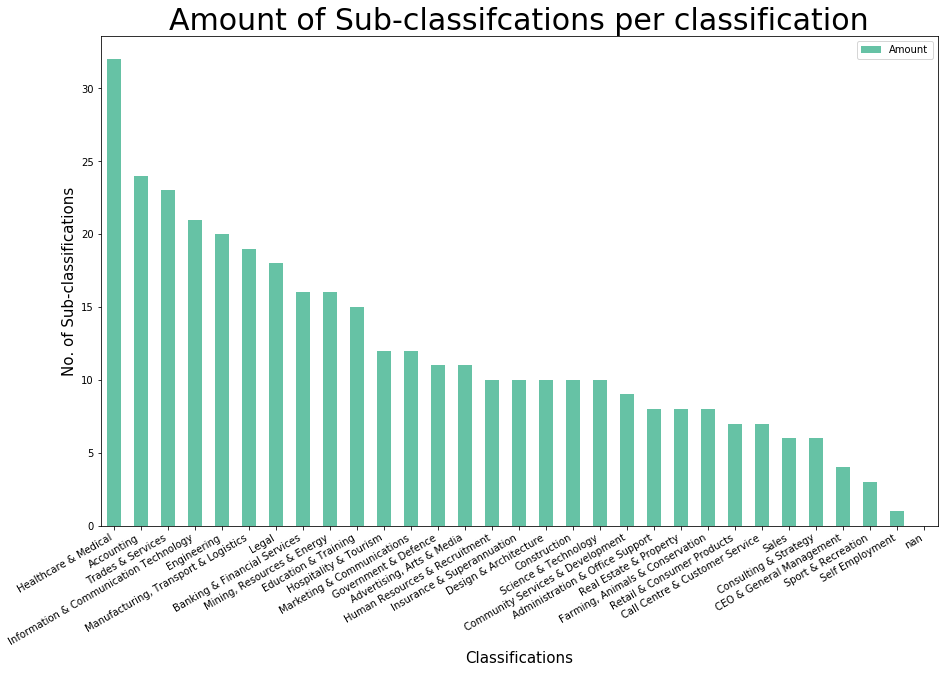

In [31]:
# Histogram showing dataspread of subclassifications per classification
# Convert our ranking into a dataframe (allows us to plot it)
df_scr = pd.DataFrame(sub_classification_ranking, columns=['Amount', 'Classification'])

f, ax = plt.subplots(figsize=(15, 10))
df_scr.plot(x='Classification',ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Amount of Sub-classifcations per classification", fontsize=30)
plt.ylabel("No. of Sub-classifications", fontsize=15)
plt.xlabel("Classifications", fontsize=15)
plt.show()

In [32]:
# What are each Classification's SubClassification?
for c in df.Classification.unique():
    print("%s:" % c)
    print(df['SubClassification'].loc[df['Classification'] == c].value_counts())
    print("")

Retail & Consumer Products:
Retail Assistants                    3879
Management - Store                   2024
Management - Department/Assistant     852
Merchandisers                         338
Management - Area/Multi-site          217
Planning                              125
Buying                                114
Name: SubClassification, dtype: int64

Call Centre & Customer Service:
Customer Service - Call Centre        2071
Customer Service - Customer Facing     610
Sales - Outbound                       367
Sales - Inbound                        255
Management & Support                   244
Supervisors/Team Leaders               148
Collections                            104
Name: SubClassification, dtype: int64

Hospitality & Tourism:
Chefs/Cooks                      4590
Waiting Staff                    2858
Bar & Beverage Staff             2578
Management                       1650
Kitchen & Sandwich Hands         1178
Front Office & Guest Services     729
Travel Agents/Co

Marketing Communications                745
Digital & Search Marketing              671
Marketing Assistants/Coordinators       582
Management                              381
Public Relations & Corporate Affairs    251
Brand Management                        246
Market Research & Analysis              204
Product Management & Development        185
Direct Marketing & CRM                  171
Event Management                        170
Internal Communications                 140
Trade Marketing                          22
Name: SubClassification, dtype: int64

Government & Defence:
Government - State               3580
Government - Local               1662
Government - Federal             1280
Policy, Planning & Regulation     296
Police & Corrections               59
Government                         43
Emergency Services                 41
Navy                               17
Local Government                   16
Air Force                          12
Army                           

#### Discussing metadata:

< Will paste in from documentation>

### Market by location
For example:
- What is the market size in each city? Which are the hottest job sectors in
each city?
- Which range of salary is common in each city? Where are the employees
more well-paid?
- Can you detect the pattern of posting: e.g. are more jobs posted at the
beginning of month?

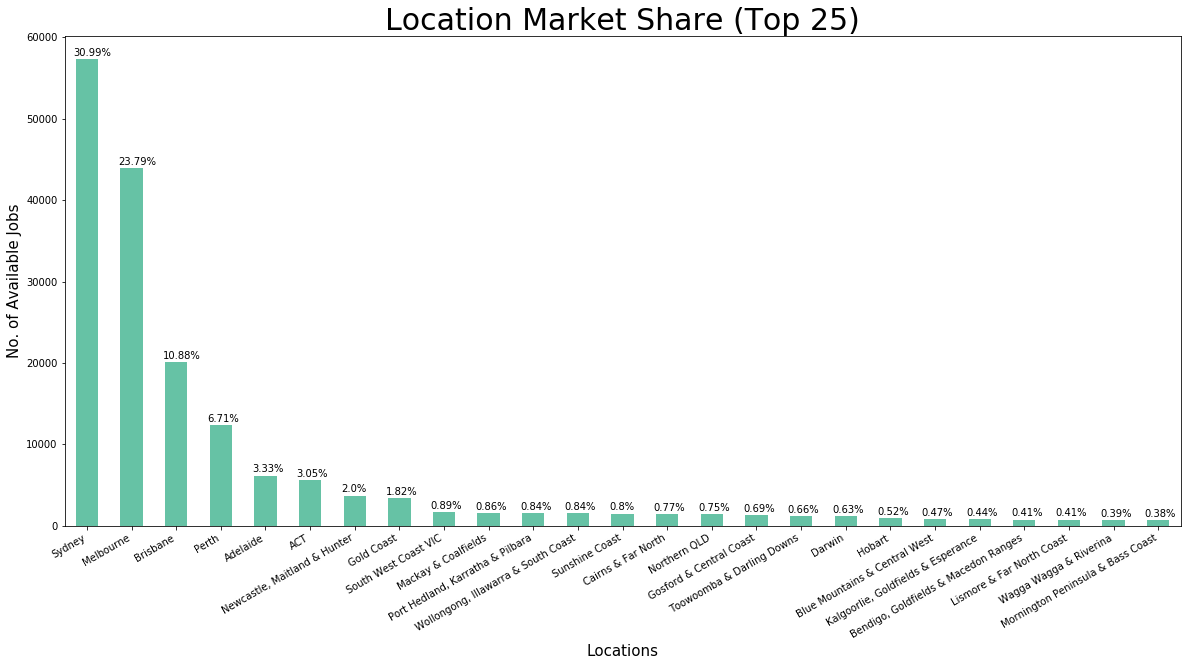

In [33]:
# Get percentages for Locations
total_location_records = 0
for i in df['Location'].value_counts():
    total_location_records += i
locations = []
for i in df['Location'].value_counts().index:
    locations.append([i])
for i, k in enumerate(df['Location'].value_counts()):
    percentage = k / total_location_records * 100
    percentage = (round(percentage, 2))
    locations[i].append(percentage)
percentages = [x[1] for x in locations]

# Histogram that shows job location market share
f, ax = plt.subplots(figsize=(20, 10))
df['Location'].value_counts().head(25).plot(ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Location Market Share (Top 25)", fontsize=30)
plt.ylabel("No. of Available Jobs", fontsize=15)
plt.xlabel("Locations", fontsize=15)
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() - 0.55
    y = p.get_y() + p.get_height() + 400
    ax.annotate(str(percentages[i]) + "%", (x, y))
plt.show()

Text(0.5, 0, 'Locations')

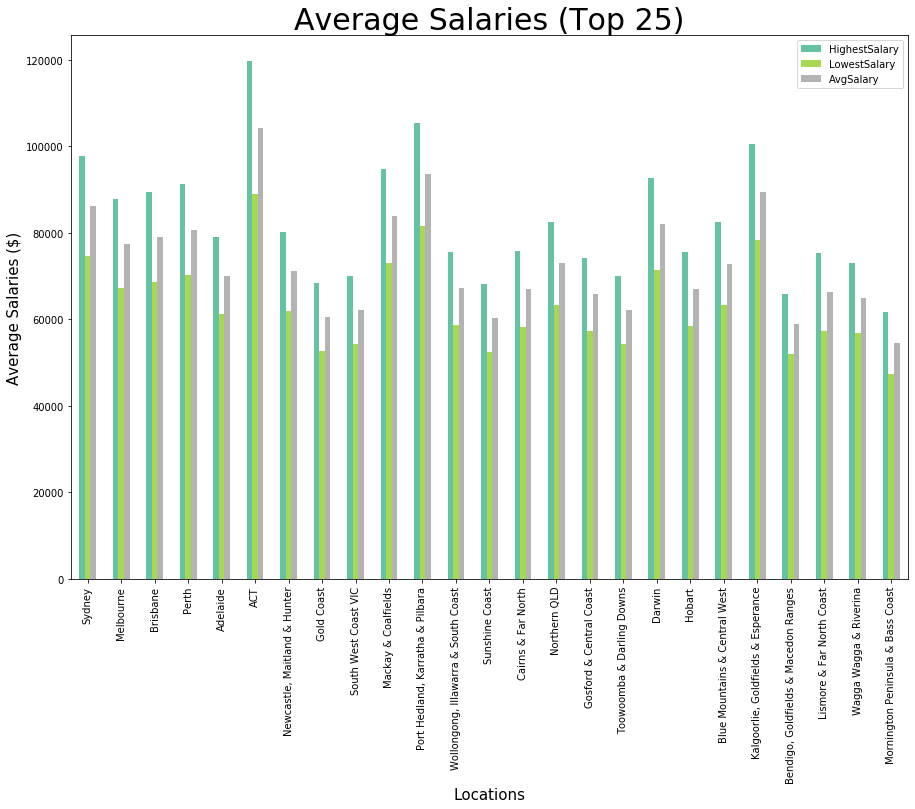

In [34]:
# A histogram that shows the mean salaries for each location
top25loc = df['Location'].value_counts().head(25).index.tolist()
top25avgsal = []
top25highsal = []
top25lowsal = []

for x in top25loc:
    temp = (df[df['Location'] == x])
    top25avgsal.append(temp['AvgSalary'].mean())
    top25highsal.append(temp['HighestSalary'].mean())
    top25lowsal.append(temp['LowestSalary'].mean())
    
data = {'Location': top25loc, 'HighestSalary': top25highsal,
        'LowestSalary': top25lowsal, 'AvgSalary': top25avgsal} 
df_sal = pd.DataFrame (data, columns = ['Location', 'HighestSalary', 'LowestSalary', 'AvgSalary'])

df_sal.plot(kind='bar', figsize = (15,10), colormap='Set2')
plt.title("Average Salaries (Top 25)", fontsize=30)
plt.xticks(np.arange(25), top25loc)
plt.ylabel("Average Salaries ($)", fontsize=15)
plt.xlabel("Locations", fontsize=15)

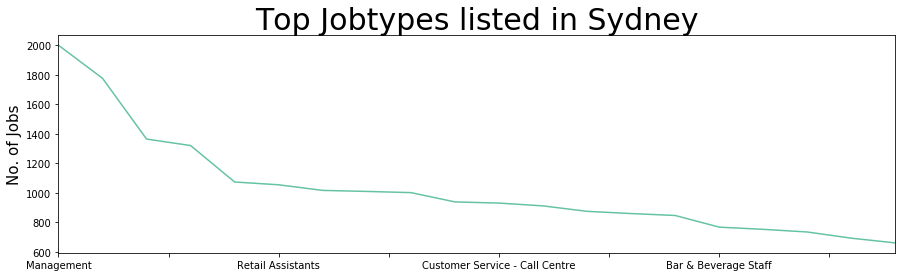

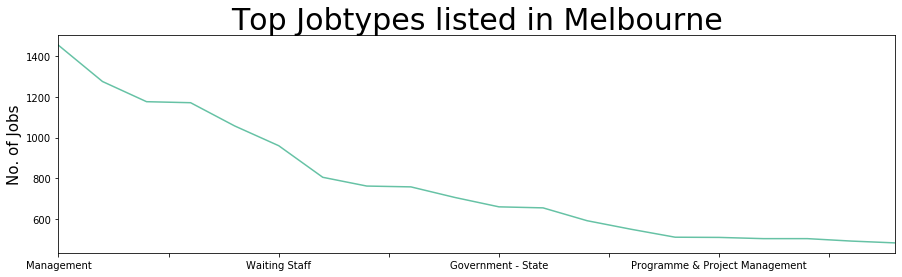

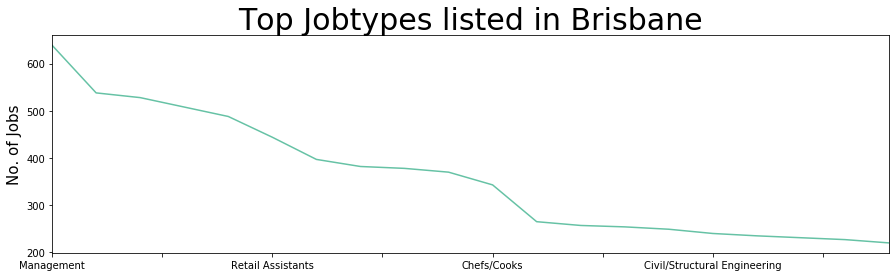

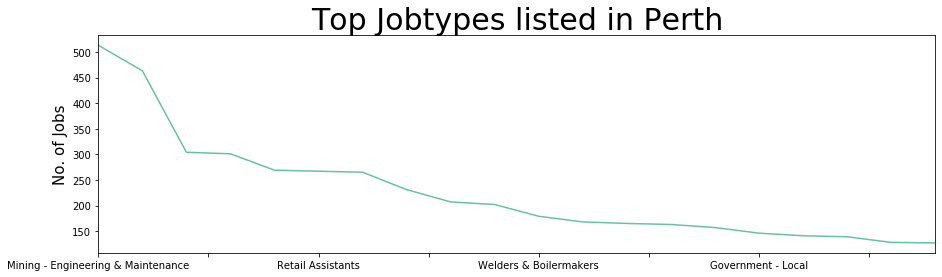

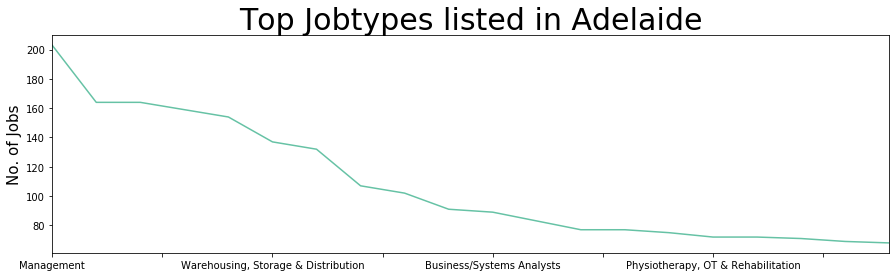

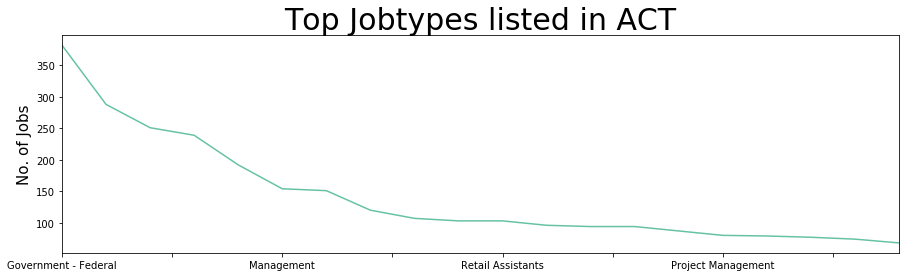

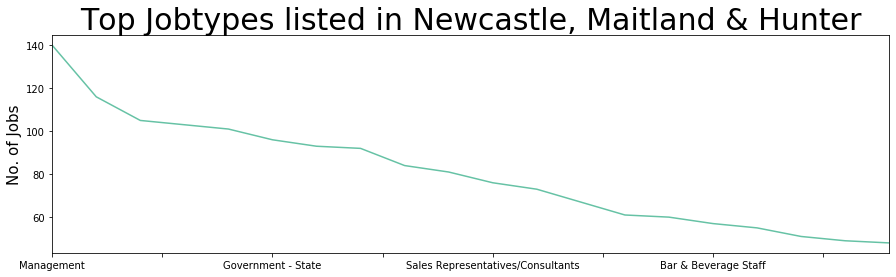

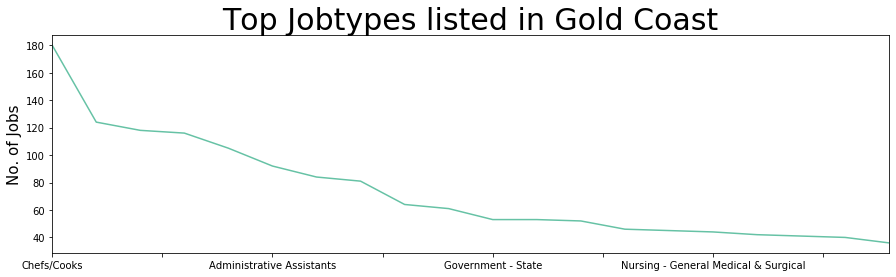

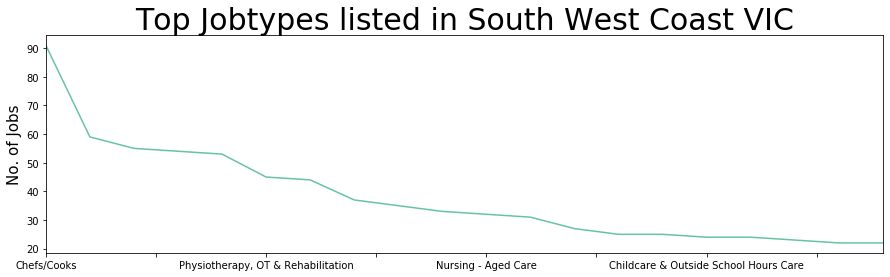

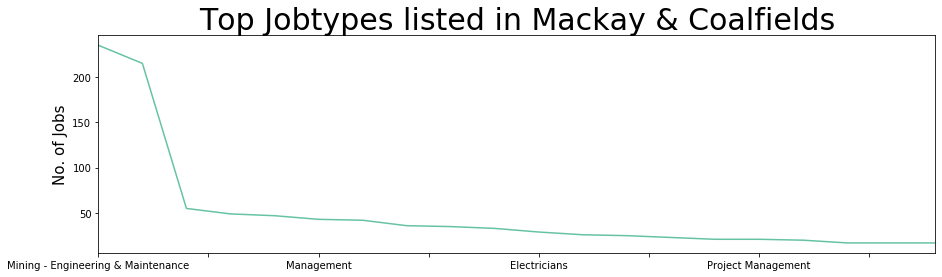

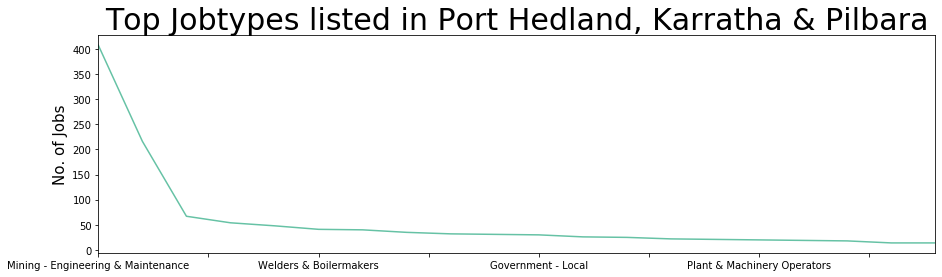

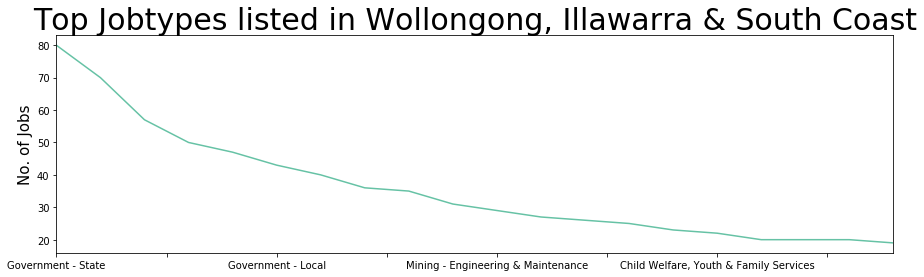

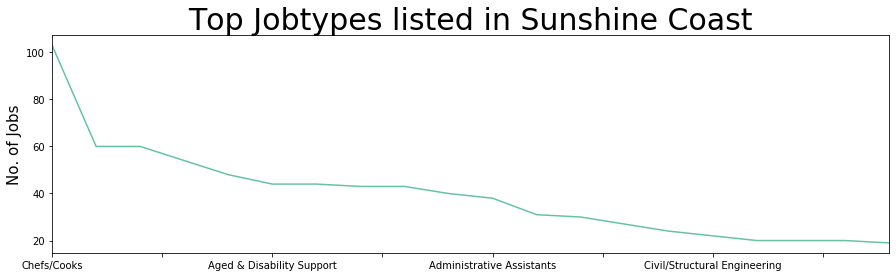

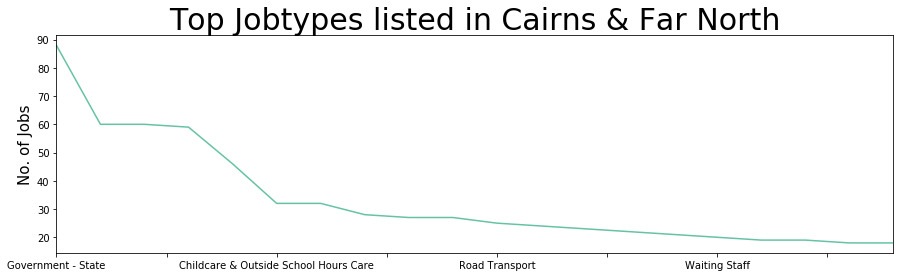

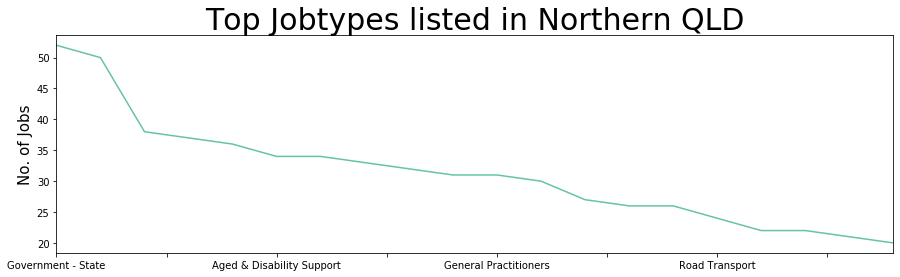

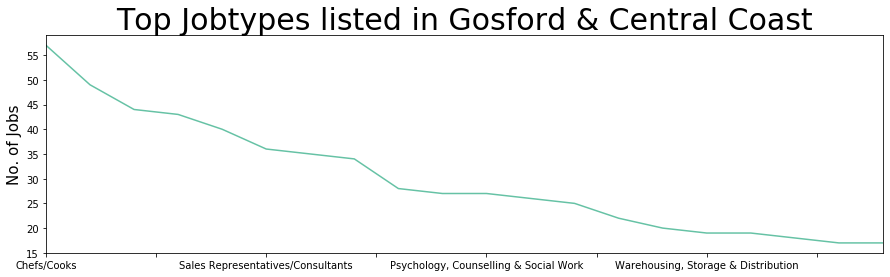

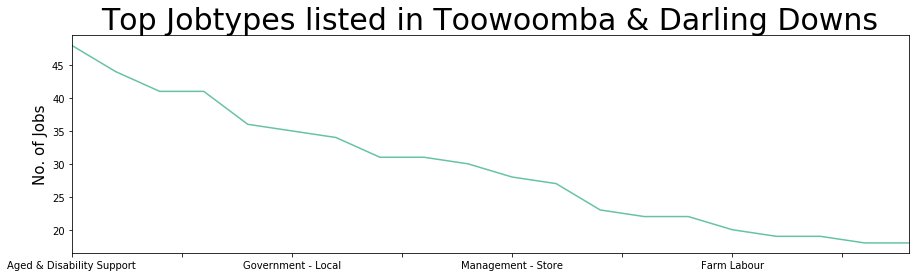

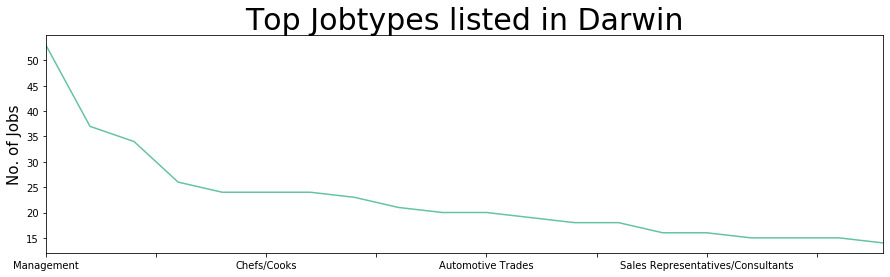

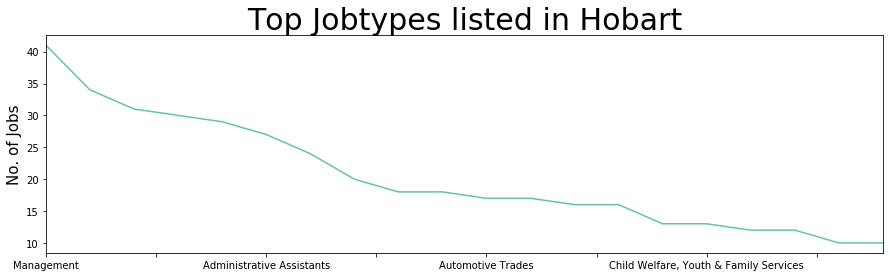

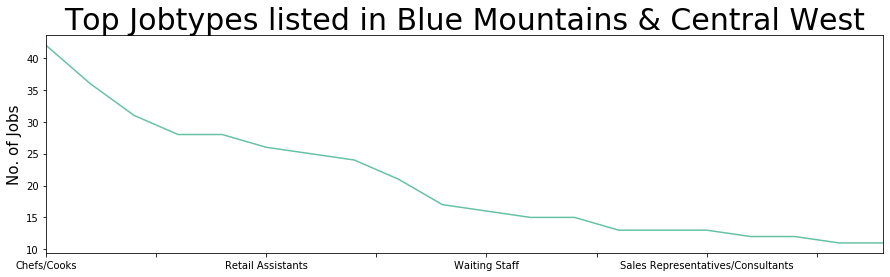

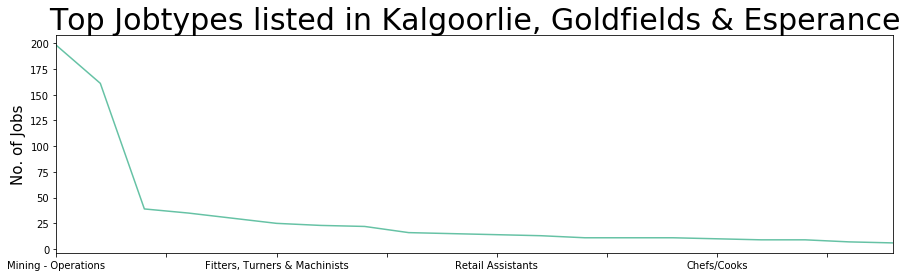

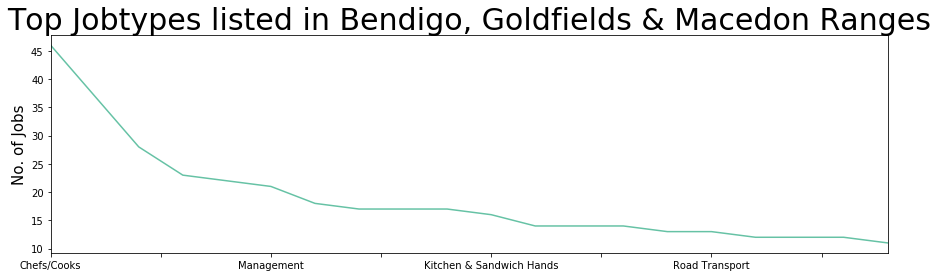

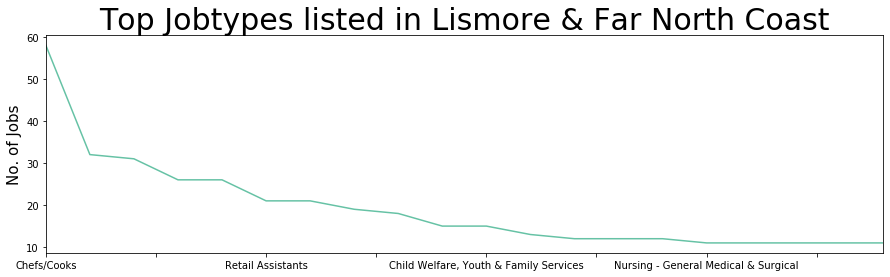

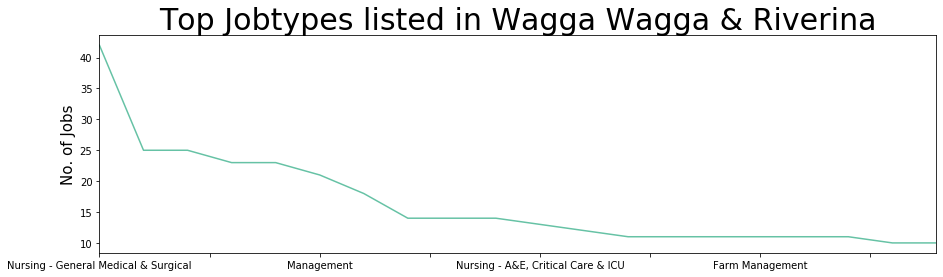

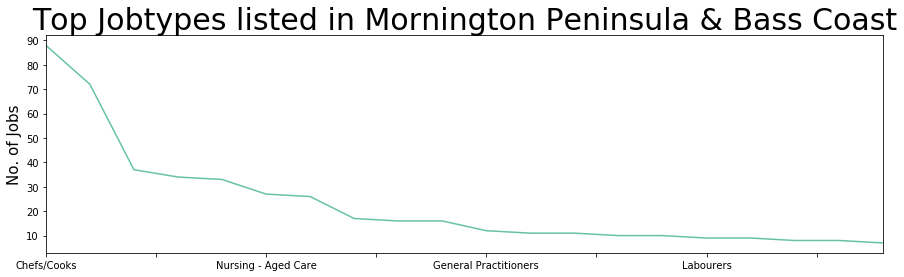

In [107]:
# Charts to look at the hottest JobTypes in our top cities
major_cities = df['Location'].value_counts().head(25).index.tolist()
for city in major_cities:
    df['SubClassification'].loc[df['Location'] == city].value_counts().head(20).plot(figsize = (15,4), colormap='Set2')
    plt.title("Top Jobtypes listed in {}".format(city), fontsize=30)
    plt.ylabel("No. of Jobs", fontsize=15)
    plt.show()


In [36]:
# Create dataframe for date/posting trends
dates_df = df.filter(['Date'], axis=1)
dates_df['Date'] = dates_df['Date'].astype('datetime64[ns]')
dates_df['day'] = df['Date'].dt.day
dates_df['month'] = df['Date'].dt.month
dates_df['year'] = df['Date'].dt.year
# dates_df = dates_df.drop('Date', axis=1)
dates_df

,Date,day,month,year
0,2018-10-07,7,10,2018
1,2018-10-07,7,10,2018
2,2018-10-07,7,10,2018
3,2018-10-07,7,10,2018
4,2018-10-07,7,10,2018
...,...,...,...,...
318472,2019-03-13,13,3,2019
318473,2019-03-13,13,3,2019
318474,2019-03-12,12,3,2019
318475,2019-03-08,8,3,2019


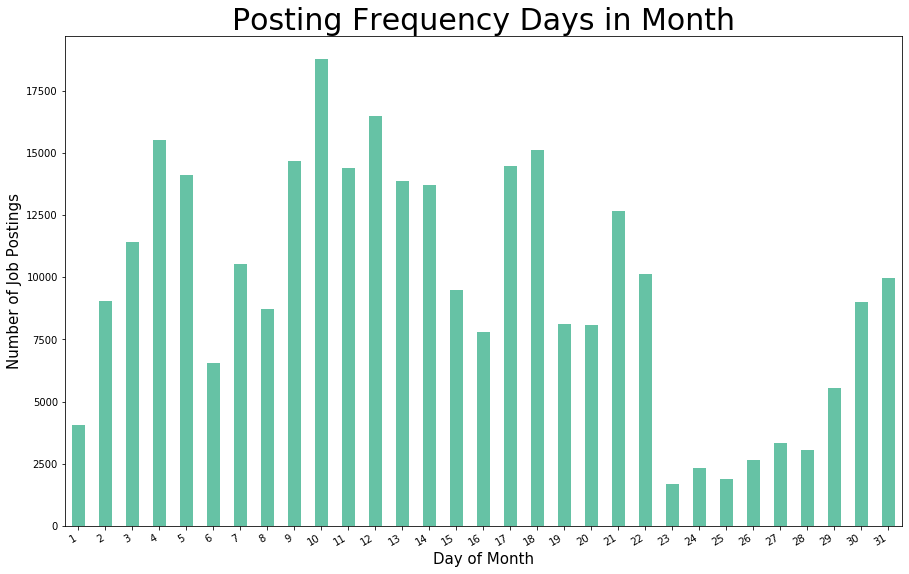

In [37]:
# Histogram that shows the frequency of jobs in locations

f, ax = plt.subplots(figsize=(15, 10))
# dates_df['day'].value_counts().plot(ax=ax, kind='bar')
dates_df.groupby("day")['day'].value_counts().plot(kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Posting Frequency Days in Month", fontsize=30)
plt.ylabel("Number of Job Postings", fontsize=15)
plt.xticks(np.arange(31), [x for x in range(1,32)])
plt.xlabel("Day of Month", fontsize=15)
plt.show()


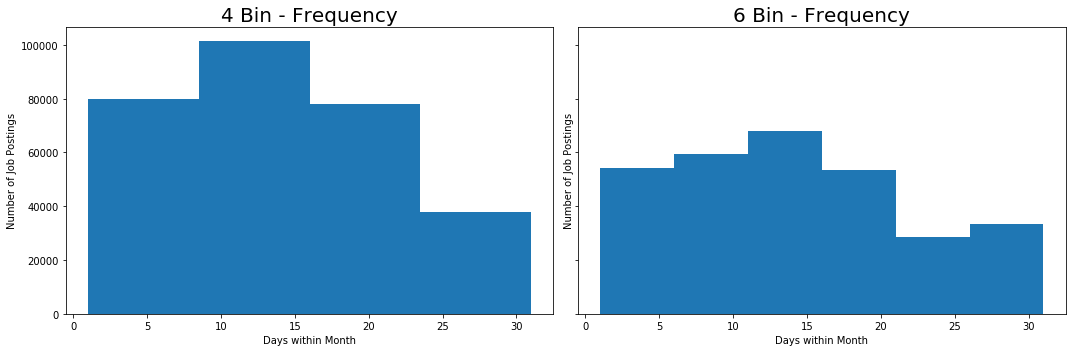

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)

axs[0].hist(dates_df['day'], bins=4)
axs[0].set_title('4 Bin - Frequency', fontsize=20)
axs[0].set_xlabel('Days within Month')
axs[0].set_ylabel('Number of Job Postings')
axs[1].hist(dates_df['day'], bins=6)
axs[1].set_title('6 Bin - Frequency', fontsize=20)
axs[1].set_xlabel('Days within Month')
axs[1].set_ylabel('Number of Job Postings')
plt.show()


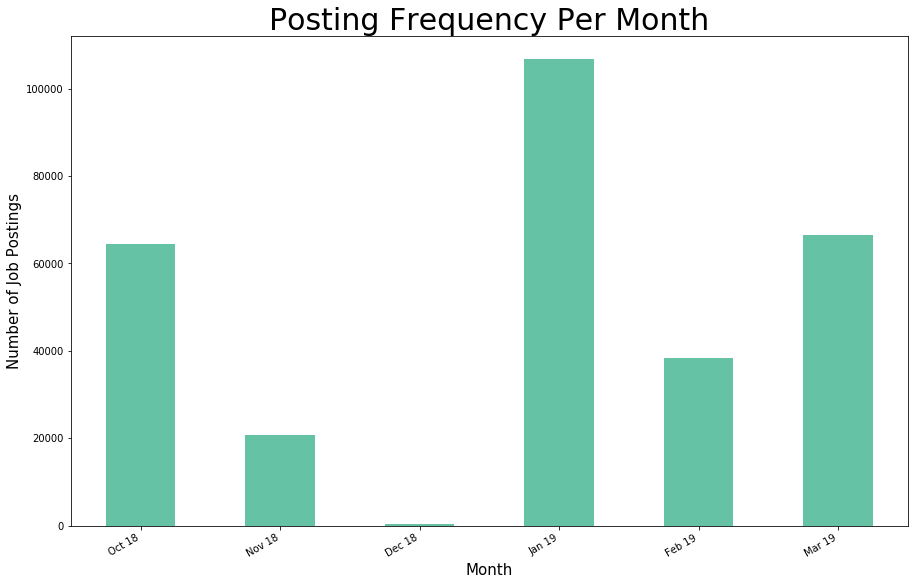

In [39]:
# Histogram that shows the frequency of jobs in locations
f, ax = plt.subplots(figsize=(15, 10))
# dates_df['month'].value_counts().plot(ax=ax, kind='bar')
dates_df.groupby("month")['month'].value_counts().plot(kind='bar',colormap='Set2')
f.autofmt_xdate()
plt.title("Posting Frequency Per Month", fontsize=30)
plt.ylabel("Number of Job Postings", fontsize=15)
plt.xticks(np.arange(6), ['Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19'])
plt.xlabel("Month", fontsize=15)
plt.show()

In [40]:
month_freq = dates_df.groupby("month")['month'].value_counts().tolist()
month_freq.append(np.nan)
month_freq.append(np.nan)
month_freq.append(np.nan)
data2 = {'months' : ['Oct18', 'Nov18', 'Dec18', 'Jan19', 'Feb19', 'Mar19', 'Apr19', 'May19', 'Jun19'],'posts': month_freq}
pred_df = pd.DataFrame(data2)
pred_df

,months,posts
0,Oct18,64446.0
1,Nov18,20776.0
2,Dec18,384.0
3,Jan19,106695.0
4,Feb19,38384.0
5,Mar19,66603.0
6,Apr19,NaN
7,May19,NaN
8,Jun19,NaN


In [41]:
# find 3 month moving average for post frequency
for i in range(0,pred_df.shape[0]-3):
    pred_df.loc[pred_df.index[i+3],'3MMA'] = np.round(((pred_df.iloc[i,1]+ pred_df.iloc[i+1,1] +pred_df.iloc[i+2,1])/3),1)
# fill in final 2 values
for i in range(0,2):
    pred_df.loc[pred_df.index[i+7],'3MMA'] = np.round(((pred_df.iloc[i+4,2]+ pred_df.iloc[i+5,2] +pred_df.iloc[i+6,2])/3),1)
pred_df

,months,posts,3MMA
0,Oct18,64446.0,NaN
1,Nov18,20776.0,NaN
2,Dec18,384.0,NaN
3,Jan19,106695.0,28535.3
4,Feb19,38384.0,42618.3
5,Mar19,66603.0,48487.7
6,Apr19,NaN,70560.7
7,May19,NaN,53888.9
8,Jun19,NaN,57645.8


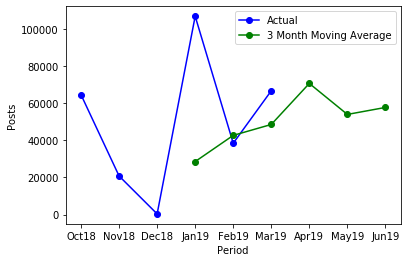

In [42]:
plt.plot(pred_df['months'],pred_df['posts'],label="Actual", color="Blue", marker='o')
plt.plot(pred_df['months'],pred_df['3MMA'],label='3 Month Moving Average', color="Green", marker='o')
plt.xlabel('Period')
plt.ylabel('Posts')
plt.xticks([k for k in range(0,8+1,1)])
plt.legend()

In [43]:
for i in range(0,pred_df.shape[0]-3):
    pred_df.loc[pred_df.index[i+1],'a=0.8'] = np.round((pred_df.iloc[i,2])+ 0.8*((pred_df.iloc[i,1])-(pred_df.iloc[i,2])),1)
for i in range(0,pred_df.shape[0]-3):
    pred_df.loc[pred_df.index[i+1],'a=0.2'] = np.round((pred_df.iloc[i,2])+ 0.2*((pred_df.iloc[i,1])-(pred_df.iloc[i,2])),1)

pred_df

,months,posts,3MMA,a=0.8,a=0.2
0,Oct18,64446.0,NaN,NaN,NaN
1,Nov18,20776.0,NaN,NaN,NaN
2,Dec18,384.0,NaN,NaN,NaN
3,Jan19,106695.0,28535.3,NaN,NaN
4,Feb19,38384.0,42618.3,91063.1,44167.2
5,Mar19,66603.0,48487.7,39230.9,41771.4
6,Apr19,NaN,70560.7,62979.9,52110.8
7,May19,NaN,53888.9,NaN,NaN
8,Jun19,NaN,57645.8,NaN,NaN


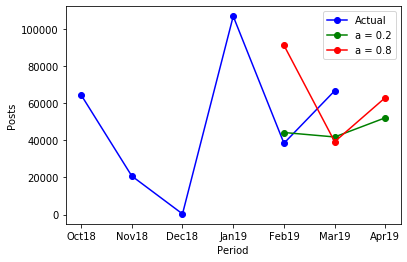

In [44]:
plt.plot(pred_df['months'],pred_df['posts'],label="Actual", color="Blue", marker='o')
plt.plot(pred_df['months'],pred_df['a=0.2'],label='a = 0.2', color="Green", marker='o')
plt.plot(pred_df['months'],pred_df['a=0.8'],label='a = 0.8', color="Red", marker='o')
plt.xlabel('Period')
plt.ylabel('Posts')
plt.xticks([k for k in range(0,7,1)])
plt.legend()

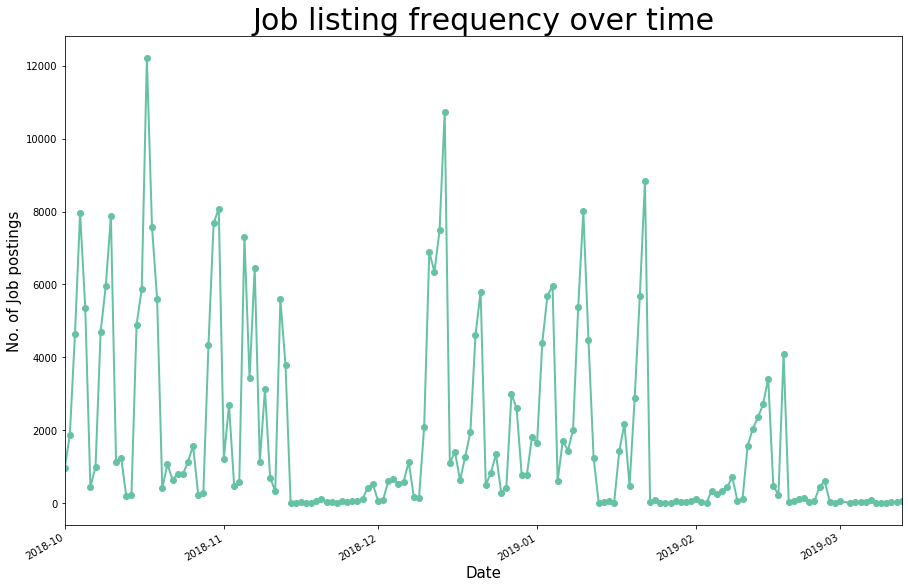

In [45]:
df['Date'].value_counts().plot(x='Date', marker='o', figsize=(15,10), linewidth=2,colormap='Set2')
plt.title("Job listing frequency over time", fontsize=30)
plt.xlabel('Date', fontsize=15)

plt.ylabel('No. of Job postings',fontsize=15)
plt.show()

### Market by Classifications
For example:
- Which sectors keep the highest market share?
- In each sector, which sub-sectors are the main spotlights?
- What is the salary range for each sector/sub-sector? Can you compare salary
range between sectors/subsectors?
- What is the trending of market i.e. if a high school student ask you which
subject should he/she learn in the university (to guarantee a job in a future),
what is your advice?
- Can you detect which skills are required in each sector?

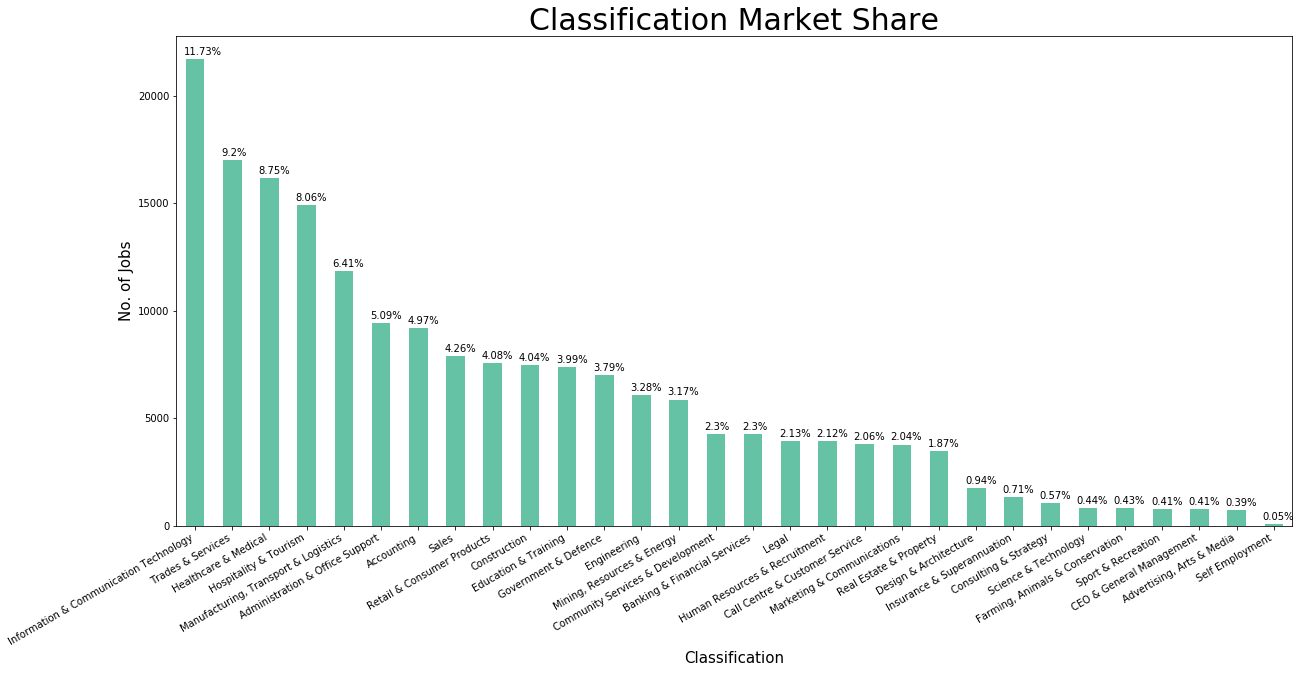

In [46]:
# Get percentages for classifications
total_classification_records = 0
for i in df['Classification'].value_counts():
    total_classification_records += i
classifications = []
for i in df['Classification'].value_counts().index:
    classifications.append([i])
for i, k in enumerate(df['Classification'].value_counts()):
    percentage = k / total_classification_records * 100
    percentage = (round(percentage, 2))
    classifications[i].append(percentage)
percentages = [x[1] for x in classifications]

# Which classifications keep the highest market share?
f, ax = plt.subplots(figsize=(20, 10))
df['Classification'].value_counts().plot(ax=ax, kind='bar', colormap='Set2')
f.autofmt_xdate()
plt.title("Classification Market Share", fontsize=30)
plt.ylabel("No. of Jobs", fontsize=15)
plt.xlabel("Classification", fontsize=15)
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() - 0.55
    y = p.get_y() + p.get_height() + 200
    ax.annotate(str(percentages[i]) + "%", (x, y))
plt.show()

In [47]:
# Top sub-sectors of each sub-sector

# Histogram
# Maybe even having 31 tiny histograms each highlighting the frequency

In [48]:
# What is the average salary for each sector?

# Histogram

In [49]:
# What is the average salary for each sub sector?

# Histogram
# 31 tiny ones

In [50]:
# Market trend?

# Time series with all classifications and their frequency
# We could then see which jobs are increasing and which are decreasing maybe?

In [51]:
# Skills required in each area?

# Maybe a sort of recommender system?
# Another option could be to look at IT jobs specifically and try to see what Programming languages are mentioned and them plot that

## Part 3 - Evaluation